# water properties worldwide: compressibility, thermal expansion ...

In [1]:
import xarray as xr
import gsw

In [2]:
files_woa = ['woa18_A5B7_t00_01.nc','woa18_A5B7_s00_01.nc']
woa = xr.merge([xr.open_dataset(f, decode_times=False) for f in files_woa]).isel(time=0)
print(woa)

<xarray.Dataset>
Dimensions:             (depth: 102, lat: 180, lon: 360, nbounds: 2)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0 5.0 10.0 ... 5300.0 5400.0 5500.0
    time                float32 726.0
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 -2147483647
    lat_bnds            (lat, nbounds) float32 -90.0 -89.0 -89.0 ... 89.0 90.0
    lon_bnds            (lon, nbounds) float32 -180.0 -179.0 ... 179.0 180.0
    depth_bnds          (depth, nbounds) float32 0.0 2.5 2.5 ... 5450.0 5500.0
    climatology_bounds  (nbounds) float32 648.0 738.0
    t_an                (depth, lat, lon) float32 ...
    t_mn                (depth, lat, lon) float32 ...
    t_dd                (depth, lat, lon) float64 ...
    t_sd                (depth, lat, lon) float32 ...
    t_se            

In [3]:
t, s, lon, lat, p = xr.broadcast(woa.t_an, woa.s_an, woa.lon, woa.lat, woa.depth)

In [4]:
SA = gsw.SA_from_SP(s, p, lon, lat)
CT = gsw.CT_from_t(SA, t, p)
kappa = gsw.kappa(SA, CT, p)

In [5]:
#CT = xr.DataArray(CT, coords=t.coords, dims=t.dims, name='CT')
#SA = xr.DataArray(CT, coords=t.coords, dims=t.dims, name='SA')
kappa = xr.DataArray(kappa, coords=t.coords, dims=t.dims, name='kappa')

(array([9.74000e+02, 7.81990e+04, 4.57225e+05, 5.68675e+05, 9.60308e+05,
        6.63927e+05, 3.26571e+05, 2.10068e+05, 3.87030e+04, 3.60000e+02]),
 array([3.85144890e-10, 3.95851551e-10, 4.06558211e-10, 4.17264872e-10,
        4.27971532e-10, 4.38678193e-10, 4.49384853e-10, 4.60091514e-10,
        4.70798174e-10, 4.81504835e-10, 4.92211495e-10]),
 <a list of 10 Patch objects>)

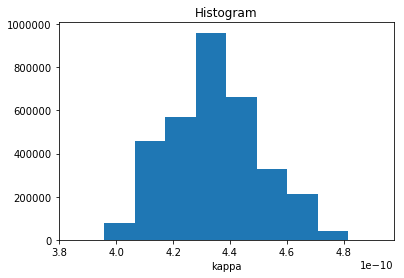

In [8]:
kappa.plot.hist()

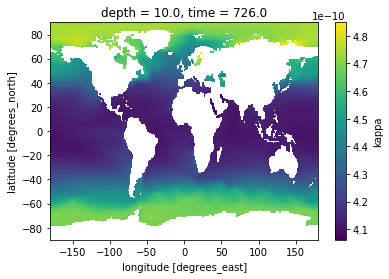

In [7]:
kappa.sel(depth=10).plot()